## Deriving the Black-Scholes-Merton Equation
Based on and transcribed from the very informative YouTube video, [FN452 Deriving the Black-Scholes-Merton Equation](https://www.youtube.com/watch?v=IynFtIQ6HaI) by Nattakit Chokwattananuwat. 

### Introduction

The Black-Scholes-Merton equation is used to price a European call or put option on a stock paying no dividends. The equation is as follows:

$\frac{\partial V}{\partial t} + \frac{1}{2}\sigma^2S^2\frac{\partial^2 V}{\partial S^2} + rS\frac{\partial V}{\partial S} - rV = 0$

where $V$ is the price of the option. This equation expresses $V$ as a function of time $t$ and stock price $S$. 



### Assumptions
The derivation will assume ideal market conditions, which are described by the following:
1. Stock price $S$ follows a stochastic process. Historical price cannot be used to predict future movement.
2. No dividends and transaction costs.
3. Risk-free rate (short-term interest rates) and volatility of stock price is known and constant.
4. Can borrow fractions of stock
5. Short selling is allowed

### Geometric Brownian Motion
We begin by examining a generalized Wiener process known as arithmetic Brownian motion (ABM):

$\partial S = \mu dt + \sigma dz$

ABM shows that changes in stock price $S$ come from two terms:
1. The drift term $\mu dt$ which represents the expected return of the stock ($\mu$) given a very small change in time ($dt$). 
2. The variance term $\sigma dz$ which represents volatility in the stock price. The uncertainty comes from $dz = \epsilon \sqrt{dt}$ where $\epsilon \sim \mathcal{N}(0, 1)$.

However, there are a couple flaws with ABM: this model of linear growth does not include compounding effects, and the stock price can also become negative.

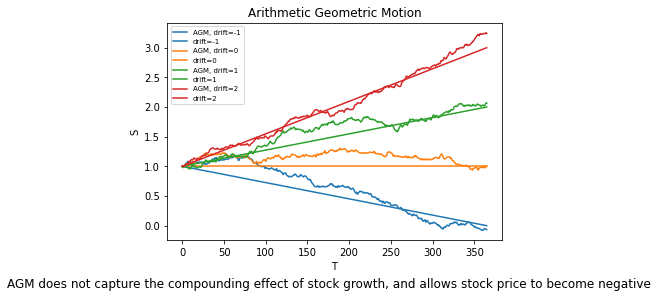

In [52]:
# Based on code from https://www.youtube.com/watch?v=QIM12cvCu4c
import numpy as np
import math 
import matplotlib.pyplot as plt

class ArithmeticGeometricMotion:
    def __init__(self, drift, volatility, delta_t, initial_asset_price):
        self.drift = drift 
        self.volatility = volatility 
        self.delta_t = delta_t
        self.current_asset_price = initial_asset_price 
        self.asset_prices = [initial_asset_price]
    
    def time_step(self):
        dz = np.random.normal(0, math.sqrt(self.delta_t)) 
        dS = self.drift * self.delta_t + self.volatility * dz 
        self.current_asset_price += dS
        self.asset_prices.append(self.current_asset_price)

processes = []
for i in range(-1, 3):
    processes.append(ArithmeticGeometricMotion(i, 0.3, 1/365, 1))

for process in processes:
    tte = 1
    while tte - process.delta_t > 0:
        process.time_step()
        tte -= process.delta_t 

x = np.linspace(0, 365, 365)
for p in processes:
    pplot = plt.plot(np.arange(0, len(p.asset_prices)), p.asset_prices, label=f'AGM, drift={p.drift}')
    y = 1 + p.drift/365*x
    _ = plt.plot(x, y, label=f'drift={p.drift}', color=pplot[0].get_color())
plt.legend(loc='upper left', prop={'size': 7})
plt.xlabel('T')
plt.ylabel('S')
plt.title('Arithmetic Geometric Motion')
txt="AGM does not capture the compounding effect of stock growth, and allows stock price to become negative"
plt.figtext(0.5, -0.04, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

### Sources
- [FN452 Deriving the Black-Scholes-Merton Equation](https://www.youtube.com/watch?v=IynFtIQ6HaI), Nattakit Chokwattananuwat (*main source*)
- [Black-Scholes PDE Derivation in 4 minutes](https://www.youtube.com/watch?v=6LhV32OIZ1Y&t=154s), QuantPy
- [Arithmetic Brownian Motion in Python](https://www.youtube.com/watch?v=QIM12cvCu4c), Quant Guild